<img src="https://housepriceprediction.com/wp-content/uploads/2018/07/11679.4c96032809c10d54e3e216015aecf32a_XL-768x450.jpg" height=600 width=1000>

Linear regression can be considered as a grandfather of regression models. It’s simple yet incredibly useful. It can be used in a variety of domains. It has a nice closed form solution, which makes model training a super-fast non-iterative process.

Recently for one of my projects I was looking for some kaggle kernels validating important assumptions of linear regression, but not found any. It made me write a kernel on Linear regression along with validating its assumptions.

If our data satisfies the assumptions that the Linear Regression model, specifically the Ordinary Least Squares Regression (OLSR) model makes, in most cases you need look no further. Before moving further, Let us discuss important assumptions of Linear regression.


** <font color='blue'> Note:   This is not an end to end solution for the problem. But I will try to validate the assumptions of linear regression </font> **


## Assumptions:

**1. <font color='red'> Linear relationship between target and independent variables:</font>** The response variable y should be a linearly related to the explanatory variables X.

**2. <font color='red'> No or Little multicollinearity between independent variables:</font>** Linear regression assumes that there is little or no multicollinearity in the data.  Multicollinearity occurs when the independent variables are too highly correlated with each other.

**3. <font color='red'> Residual errors must be normally distributed:</font>** The residual errors should be normally distributed.

**4. <font color='red'> Residual errors must be homoscedacitic:</font>** The residual errors should have constant variance. Otherwise it is known as hetroscedacity.



Eventhough on internet we can see more assumptions like normal distribution of input variables and target and others, the above are the most important ones. So we will go with it.


**Let's get our hands dirty with data and we will check the assumptions as we will go further.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import matplotlib.style as style
from scipy import stats
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import scipy
import matplotlib.gridspec as gridspec
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
print(data.shape)
data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let us go through what each feature is:

* ID - Unique ID for each home sold
* date- Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Exploratory Data Analysis


### Checking for missing values

In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We have not any missing values.We are ready to go

### Analyzing target: Price

In [5]:
#helper function
#function for ploting Histogram,Q-Q plot and 
# Box plot of target and also print skewness
def target_analysis(target):
    fig = plt.figure(constrained_layout=True, figsize=(14,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(target,norm_hist=True,ax=ax1)
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Q-Q Plot')
    stats.probplot(target,plot=ax2)
    ax3 = fig.add_subplot(grid[:,2])
    ax3.set_title('Box Plot')
    sns.boxplot(target,orient='v',ax=ax3)
    print(f'skweness is { target.skew()}')
    plt.show()

skweness is 4.024069144684712


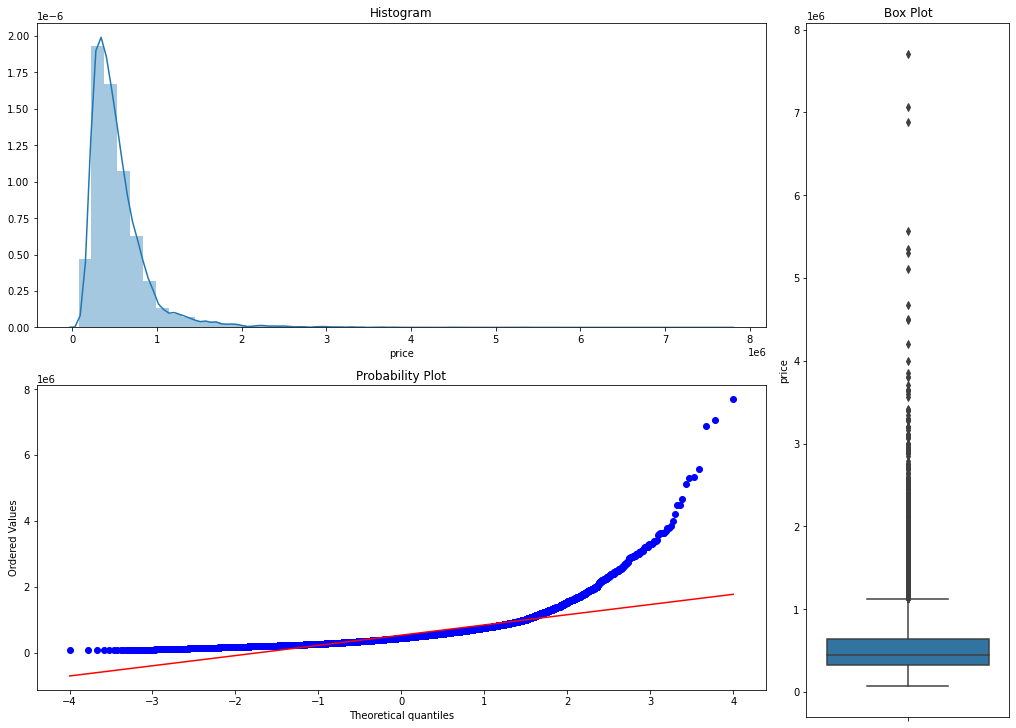

In [6]:
target_analysis(data['price'])

skweness is 0.4280765149574905


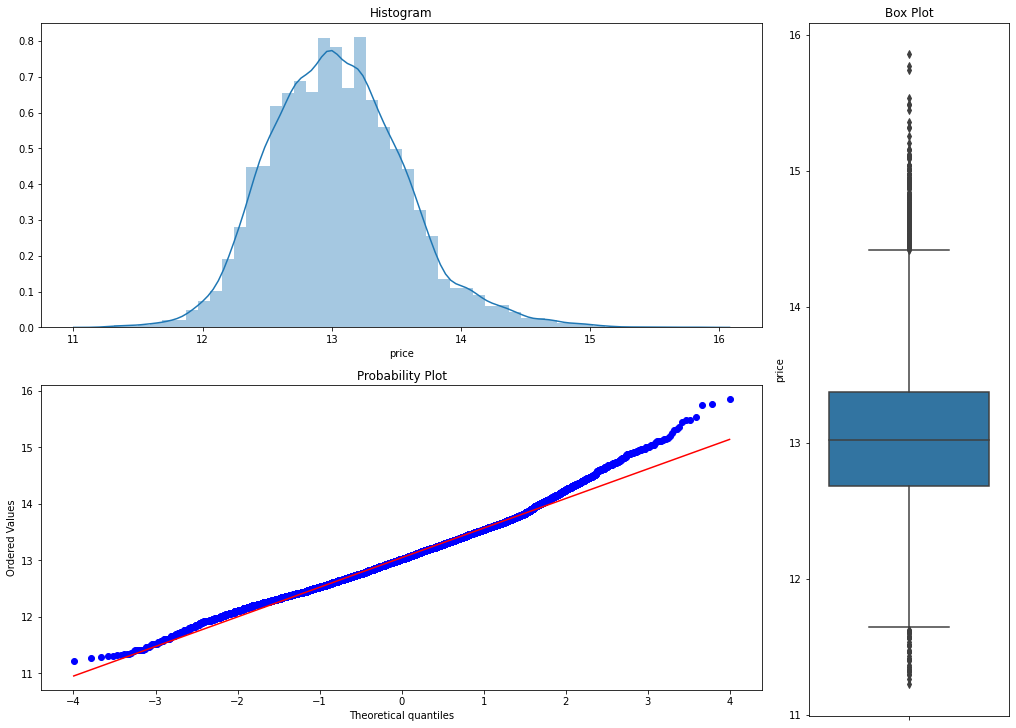

In [7]:
target_analysis(np.log1p(data['price']))

Its better if we make the target normal. Eventhough it is not an assumption of linear regression, it will helps to better analysis with our residuals later. Actaully our target is right skwedwith skweness of about  4.024. By taking log of ot we are able to reduce the skweness and make it normal to ceratin extend. We can do the reverse after prediction.

In [8]:
# transforming logprice
data['log_price'] = np.log1p(data['price'])

In [9]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

### Checking distribution of independent Features



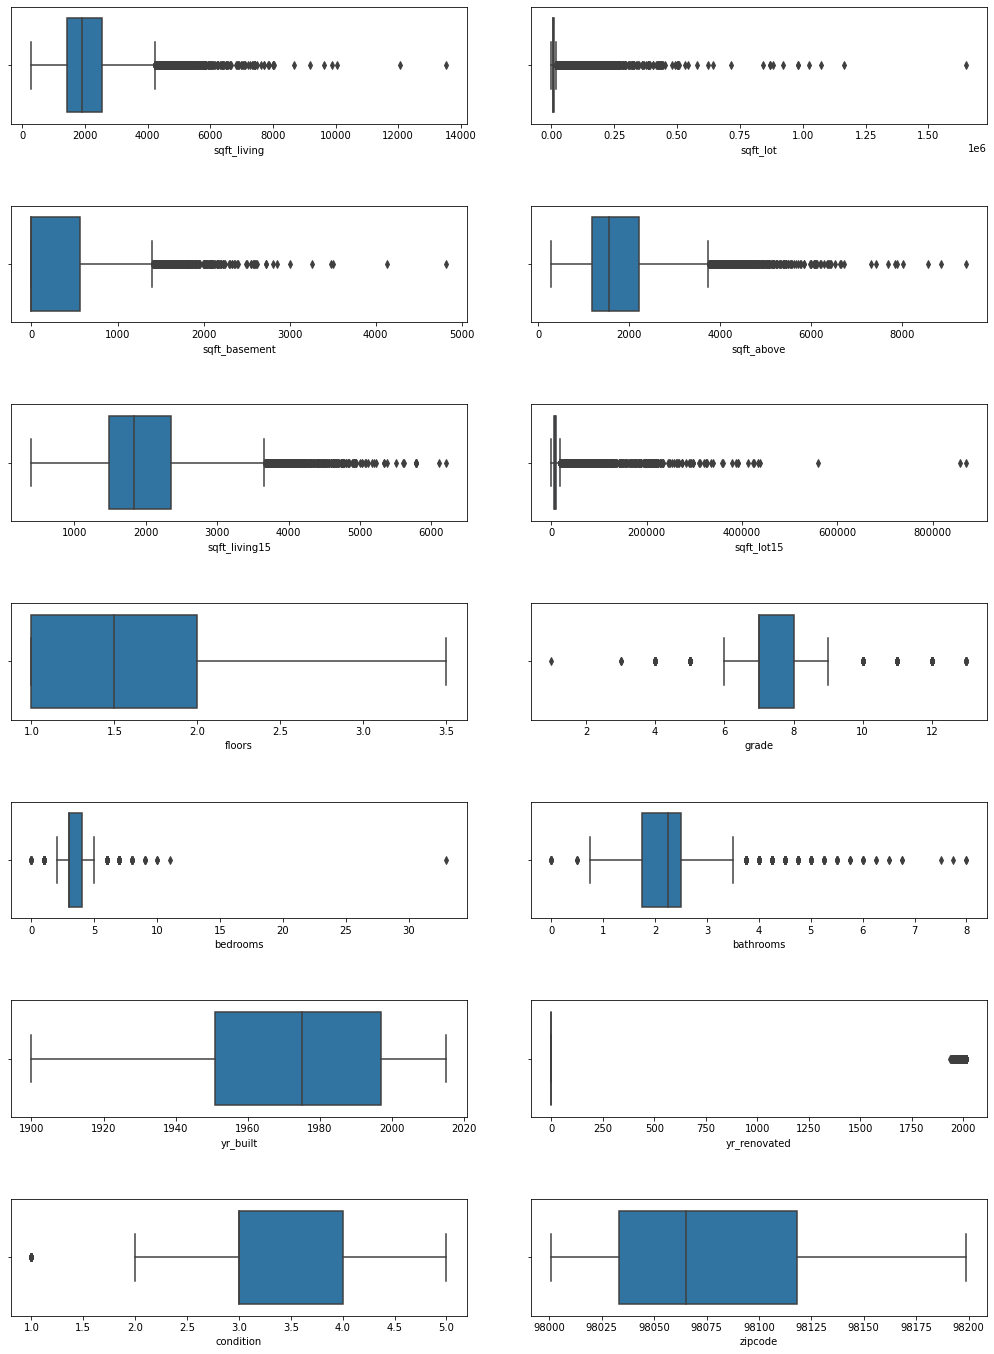

In [10]:
df_num = data[['sqft_living','sqft_lot','sqft_basement','sqft_above','sqft_living15','sqft_lot15','floors','grade',
             'bedrooms','bathrooms','yr_built','yr_renovated', 'condition','log_price','zipcode']]

multicoll_pairs = df_num.drop(columns=['log_price']).columns.to_list()

fig,axes = plt.subplots(7,2,figsize=(15,20))

def plot_two(feat,i,j):
    sns.boxplot(x=df_num[feat],ax=axes[i,j])
    fig.tight_layout(pad=5.0)

    

for i,feat in enumerate(multicoll_pairs):
    j = i%2 #0 or 1
    plot_two(feat,i//2,j)

We can see some outlier kind of points in all most of the features. Removing all of them can make loss of information. So as of now we will keep it.

### <font color='red'>Checking Linearity: (Assumption 1)</font>

Linearity of independent variables is an important assumption of linear regression. Let us see how much linearity is there.

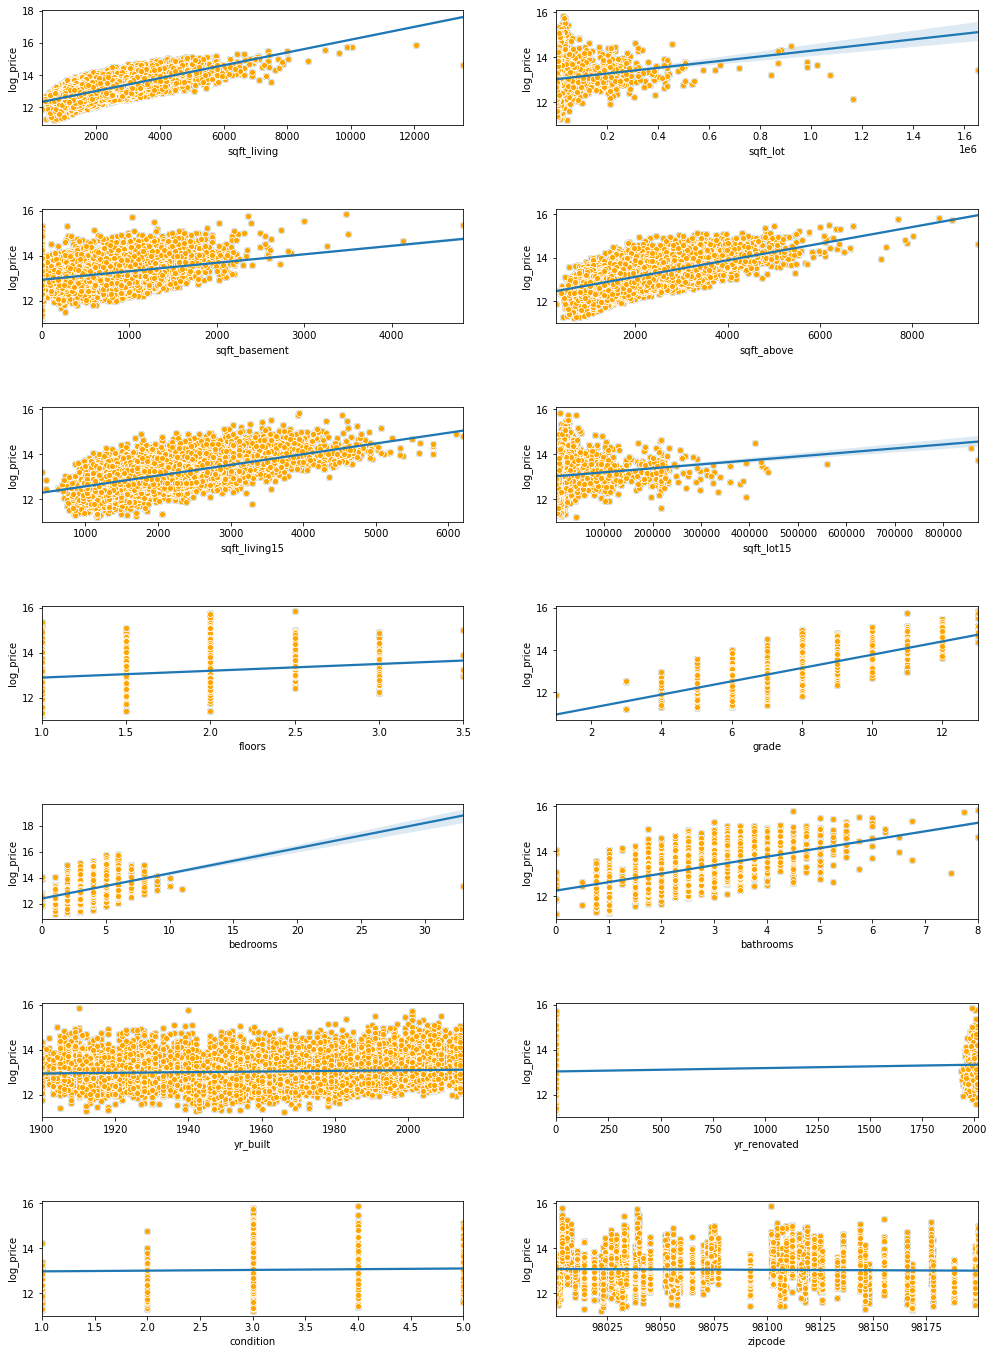

In [11]:
# df_num = df[['sqft_living','sqft_lot','sqft_basement','sqft_above','sqft_living15','sqft_lot15','bedrooms','bathrooms','yr_built','yr_renovated','log_price']]

multicoll_pairs = df_num.drop(columns=['log_price']).columns.to_list()

fig,axes = plt.subplots(7,2,figsize=(15,20))

def plot_two(feat,i,j):
    sns.regplot(x=df_num[feat], y=df_num['log_price'], ax=axes[i,j])
    sns.scatterplot(y=df_num['log_price'],x=df_num[feat],color=('orange'),ax=axes[i,j])   
    fig.tight_layout(pad=5.0)
    

for i,feat in enumerate(multicoll_pairs):
    j = i%2 #0 or 1
    plot_two(feat,i//2,j)


* We can see that sqft_living, sqft_basement, sqft_above, sqft_living15, shows good linearity.

* We can see that sqft_lot and sqft_lot15 is not that much linear. We can feature transform them or drop them.

* Number of bathrooms and bedrooms,floors, grades are also showing some linearity. So I think we do not need to convert them to categorical.

* yr_built and yr_renovated doesnot show any sort of linearity.We will further feature engineer them.


* Features like view, condition,zipcode behave categorical. So we will one hot encode them and use them as categorical features.

* From boxplot it is clear that there is an outlier in bedrooms and we will remove it after analyzing if needed.

> It is important to note that here by linearity we donot assume that our features must be perfectly linear. Almost linear is suffiecient for us to proceed further.

In [12]:
data = data.drop(columns=['sqft_lot15','sqft_lot'])

### Analyzing bedrooms

In [13]:
data['bedrooms'].describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [14]:
data[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,log_price
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,13.369225


In [15]:
# we will drop that row
data = data[data['bedrooms'] != 33]

### Analyzing Year of sale and Age of  building

From date column we can easily get year of sale

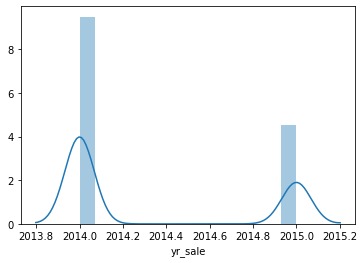

count    21612.000000
mean      2014.322969
std          0.467622
min       2014.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: yr_sale, dtype: float64

In [16]:
data['yr_sale'] = data['date'].apply(lambda x: int(str(x)[0:4]))

sns.distplot(data['yr_sale'])
plt.show()
data['yr_sale'].describe()

We can see that all sales occured in year 2014 and 2015. We can also create a new feature Age of house at the time of sale from this.

In [17]:
data['age'] = -(data['yr_built'] - data['yr_sale'])

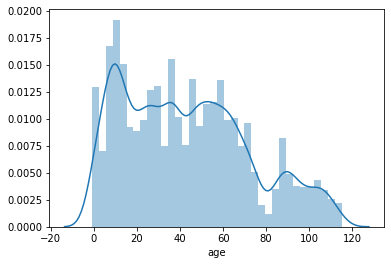

count    21612.000000
mean        43.316722
std         29.375731
min         -1.000000
25%         18.000000
50%         40.000000
75%         63.000000
max        115.000000
Name: age, dtype: float64

In [18]:
sns.distplot(data['age'])
plt.show()
data['age'].describe()

Let us check the linearity of data

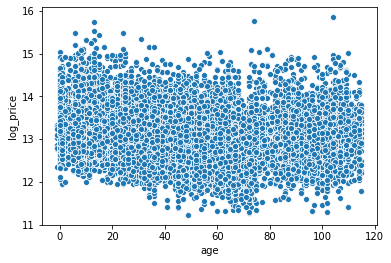

In [19]:
sns.scatterplot(data['age'],data['log_price'])
plt.show()

We can see that there is no direct connecting between price and age. So we will convert it categorical.

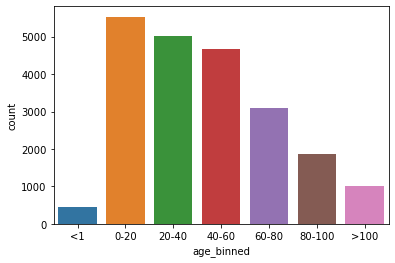

In [20]:
bins = [-30,0,20,40,60,80,100,120]
labels = ['<1','0-20','20-40','40-60','60-80','80-100','>100']
data['age_binned'] = pd.cut(data['age'], bins=bins, labels=labels)

sns.countplot(data['age_binned'])
plt.show()

### Analyzing year_built and year_renovated

count    21612.000000
mean      1971.006247
std         29.373636
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

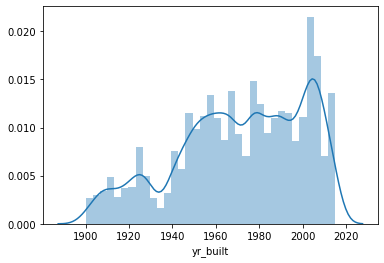

In [21]:
sns.distplot(data['yr_built'])
data['yr_built'].describe()

All our year_bult data  ranges betwwen 1900 to 2015. So we will custom encode it by dividing it to span of 10 years. for eg: if year_built between 1900-1910 -> 1, 1910-1920 -> 2 and likewise.

In [22]:
yr = [i for i in range(1900,2020)]
vals = [i for i in range(1,13) for j in range(10)]


dict_yr = { k:v for k,v in zip(yr,vals)}
data['yr_built_cat'] = data['yr_built'].map(dict_yr)
    

Similary we will create a categorical column if the house is renovated

In [23]:
data['is_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x>0 else 0)

### <font color='red'>Checking for multicollinearity of independent features (Assumption 2)</font>

Next we will check multicollinearity of independent features and we will remove if we found any. We will use pearsons correlation for that.

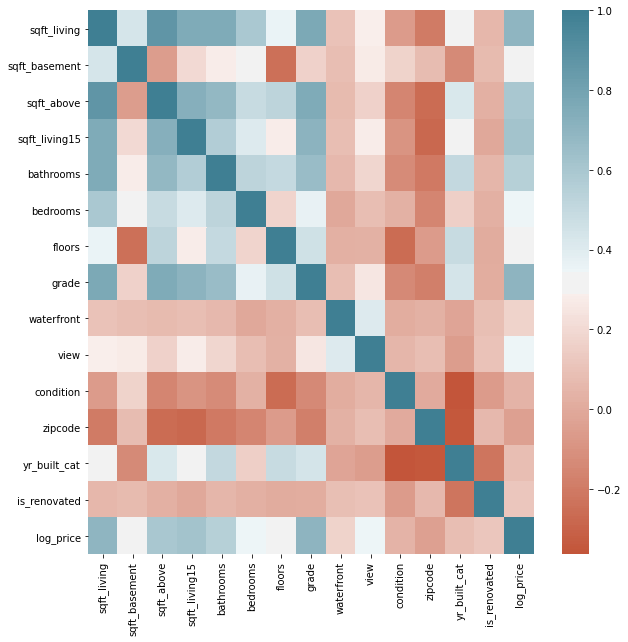

In [24]:
df = data[['sqft_living','sqft_basement','sqft_above','sqft_living15','bathrooms','bedrooms','floors','grade',
    'waterfront','view','condition','zipcode','yr_built_cat','is_renovated','age_binned','log_price']]
corr = df.corr()
# 'sqft_lot15','sqft_lot',
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

There is no strong negative coorelation. There exist a somewhat strong positive coorelation between sqft_living and sqft_above.  Let us see how strong it is.

In [25]:
df[['sqft_living','sqft_above','log_price']].corr()

,sqft_living,sqft_above,log_price
sqft_living,1.000000,0.876597,0.695365
sqft_above,0.876597,1.000000,0.601844
log_price,0.695365,0.601844,1.000000


Both of them maintains strong positive coorelation with each other. So its better we drop one feature. We will drop sqft_above (As it has lesser coorelation with target compared to sqft_living.)

In [26]:
df = df.drop(columns=['sqft_above'])

### Train test split

In [27]:
num_cols = ['sqft_living','sqft_basement','sqft_living15','bathrooms','bedrooms','floors','grade']
# 'sqft_lot15','sqft_lot'

X = df.drop(columns=['log_price'])
y = df['log_price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(15128, 14)
(6484, 14)
(15128,)
(6484,)


### One hot encoding

Now we will one hot encode categorical features. For reading more about one onehot encoding refer: https://www.kaggle.com/arunmohan003/encoding-categorical-variables-tutorial

In [28]:

feats = ['waterfront','view','condition','yr_built_cat','is_renovated','age_binned','zipcode']
one_hot_tr = pd.get_dummies(X_train[feats])
one_hot_test = pd.get_dummies(X_test[feats])
cat_train,cat_test = one_hot_tr.align(one_hot_test,join='left',axis=1)


### Normalization

It is important that we must standardize the data before fitting to regression models

In [29]:
std = StandardScaler()
std.fit(X_train[num_cols])
X_train[num_cols] = std.transform(X_train[num_cols])
X_test[num_cols] = std.transform(X_test[num_cols])

In [30]:
X_train = pd.concat((X_train[num_cols],cat_train),axis=1)
X_test = pd.concat((X_test[num_cols],cat_test),axis=1)

In [31]:
X_train.columns

Index(['sqft_living', 'sqft_basement', 'sqft_living15', 'bathrooms',
       'bedrooms', 'floors', 'grade', 'waterfront', 'view', 'condition',
       'yr_built_cat', 'is_renovated', 'zipcode', 'age_binned_<1',
       'age_binned_0-20', 'age_binned_20-40', 'age_binned_40-60',
       'age_binned_60-80', 'age_binned_80-100', 'age_binned_>100'],
      dtype='object')

## Model - Linear regression

In [32]:
reg = LinearRegression()
reg.fit(X_train,y_train)

train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)


In [33]:
print(f'Train mse: {np.sqrt(mean_squared_error(y_train,train_pred))}')
print(f'Test mse: {np.sqrt(mean_squared_error(y_test,test_pred))}')
print('-'*50)
print(f'Train R2: {r2_score(y_train,train_pred)}')
print(f'Test R2: {r2_score(y_test,test_pred)}')

Train mse: 0.30316289607946884
Test mse: 0.3107346102567434
--------------------------------------------------
Train R2: 0.6665115670309741
Test R2: 0.6570857391738484


### <font color='red'>Checking Residual errors are normally distributed (Assumption 3)</font>

This is not a strict assumption of linear regression. Nothing will go horribly wrong with your regression model if the residual errors ate not normally distributed. Normality is only a desirable property.

What’s normally is telling us is that most of the prediction errors from your model are zero or close to zero and large errors are much less frequent than the small errors. Q-Q plot is a effective way to check normality.

skweness is -0.08668580924840283


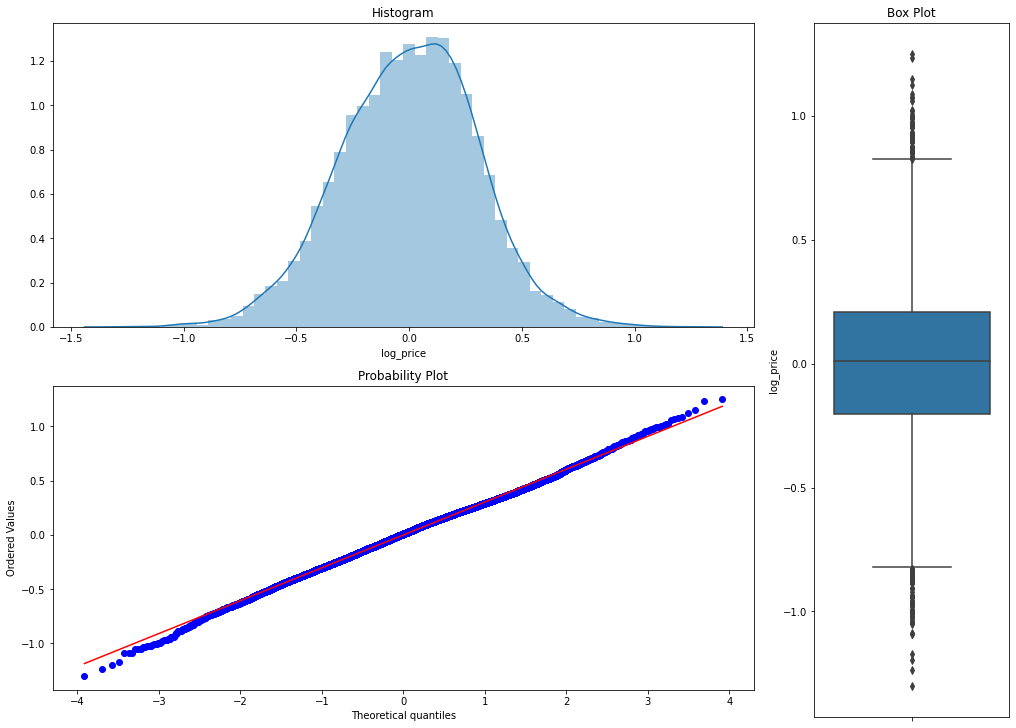

In [34]:
residuals = y_train - train_pred
target_analysis(residuals)

Thats great , we got an approximate normal distribution. (it is evident from Q-Q plot)

### <font color='red'> Checking for Homoscedacity (Assumption 4) </font>



Homoscedacity means equal variance distribution and hetrosceadacity means unequal variance distribution.
We will check the nature between residuals and fitted value to check for heteroscedacity. Usually if it is heteroscedacitic, we will get a funnel shaped plot.

> Heteroscedastic errors frequently occur when a linear model is fitted to data in which the fluctuation in the response variable y is some function of the current value y, for e.g. it is a percentage of the current value of y. 

>  The presence of non-constant variance in the error terms results in heteroskedasticity. Generally, non-constant variance arises in presence of outliers or extreme leverage values. Look like, these values get too much weight, thereby disproportionately influences the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.


To check homoscedacity, one can look at residual vs fitted values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern (shown in next section).

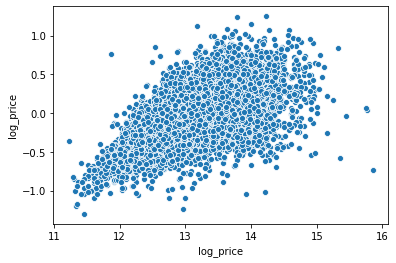

In [35]:
residuals = y_train - train_pred

sns.scatterplot(y_train,residuals)
plt.show()

It is evident that hetroscedacity is present in our data. It violates the assumption of linear regresion. It is not a surpricing factor because in earlier box plots itself we had seen some outliers present in data. I donot removed it because removing all outliers is removing an entire portion of useful data.So it is not recommended. So either we can transform those features(taking log, sqrt etc) or based on domain expertise we can remove some outliers and reduce hetroscedacity.

> How to fix hetroscedacity (general)?
> 
> * Transform the dependent variable so as to linearize it and dampen down the heteroscedastic variance. Commonly used transforms are log(y) and square-root(y).
> * Identify important variables that may be missing from the model, and which are causing the variance in the errors to develop a pattern, and add those variables into the model. Alternately, stop using the linear model and switch to a completely different model such as a Generalized Linear Model, or a neural net model.
> * Simply accept the heteroscedasticity present in the residual errors.

Here we will just accept the hetroscedacity. You are always welcome to transform those features and see tha result.


## Scope of Improvement

* There are several other ways to validate the assumptions. I just proposed the simpler ways.

* There is more scope of feature engineering here. Still you can transform features in to square, log etc of independent features and try out it in linear models(Also it can help to remove hetroscedacity).

* You can also try non linear regression models and tree based models which can improve perfomance to great extend.

## <font color='red'> If you find my kernel useful please do Upvote </font>
